In [ ]:
## This coding is to monitor induction motor electrical and machanical faults in both loaded and unloaded cases using FFT-Informed Machine learning framework. 
## All the experimental datasets are collected by FM Global Research. 
## All the inputs are after FFT processing.
## Coder: Jingyi Yan     Date: 10/8/2025     @ DOES Lab, UTD


## Module 1: Electrical Fault Detection

In [1]:
%reset -f  

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

### Data processing

In [3]:
## determine train and validate ratio
rt = 0.6 # training ratio
rv = 1-rt # validation ratio

In [4]:
## Read filename from the folder
## We will use testing sets 0 and 1 to build machine learning models (train and validate), 
## and other testing sets from another experiment to test the diagnosis performance.
import os 
from pprint import pprint 
file2=[]
file2_test=[]
root='/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT'
for dirname, dirnames, filenames in os.walk(root):
    # print path to all subdirectories first.
    for filename in filenames:         
        if 'State' in filename: #for testing
            continue  
        file2.append(os.path.join(dirname, filename))

for dirname, dirnames, filenames in os.walk(root):
    for filename in filenames:
        if 'State' in filename: 
            file2_test.append(os.path.join(dirname, filename))
print(file2)
print(len(file2))
print(file2_test)
print(len(file2_test))

['/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Broken Rotor Bar_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Baseline_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/A-B_test0_FFT05V

In [5]:
## Data loading and labeling for electrical fault detection
## 0 - there is no electrical fault
## 1 - there is electrical fault
## only use 10 seconds of the dataset
import pandas as pd
import numpy as np

train=[]
validate=[]
test=[]
file=file2.copy()
for i in range(0,len(file)):
    if 'Baseline' in file[i]:
        t=0
    elif 'A-B' in file[i]:
        t=1
    elif 'Broken' in file[i]:
        t=1
    elif 'Mechanical' in file[i]:
        t=0
    else:
        t=0
    print(file[i])
    df=pd.read_csv(file[i])
    df_type=pd.DataFrame(np.ones(len(df))*t,columns=['type'])
    df2=pd.concat([df,df_type.astype(int)],axis=1)
    df2=df2[:10000*10]
    print(t,len(df2),len(df2.columns))
    if len(train)==0: 
        train=df2.iloc[:int(len(df2)*rt)] #rt:training ratio
        validate=df2.iloc[int(len(df2)*rt):]
    else:
        train=pd.concat([train,df2.iloc[:int(len(df2)*rt)]],axis=0)
        validate=pd.concat([validate,df2.iloc[int(len(df2)*rt):]],axis=0)
        
file=file2_test.copy()
for i in range(0,len(file)):
    if 'Baseline' in file[i]:
        t=0
    elif 'A-B' in file[i]:
        t=1
    elif 'Broken' in file[i]:
        t=1
    elif 'Mechanical' in file[i]:
        t=0
    else:
        t=0
    print(file[i])
    df=pd.read_csv(file[i])
    df_type=pd.DataFrame(np.ones(len(df))*t,columns=['type'])
    df2=pd.concat([df,df_type.astype(int)],axis=1)
    df2=df2[:10000*10]
    print(t,len(df2),len(df2.columns))
    if len(test)==0: 
        test=df2
    else:
        test=pd.concat([test,df2],axis=0)
print(len(train))
print(len(validate))
print(len(test))

/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test1_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 18
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test0_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 18
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 18
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test0_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 18
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Broken Rotor Bar_test1_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 18
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 18
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Baseline_test1_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 18
/home/jingyi/Jy/Conditio

In [6]:
print(len(train[train.type==0]))
print(len(train[train.type==1]))
print(len(train[train.type==2]))
print(len(train[train.type==3]))

480000
480000
0
0


In [7]:
print(train)
print(validate)
print(test)

               VA          VB          VC      CT 1      CT 2      CT 3  \
0      146.558228   32.856323 -148.567566 -3.093462 -1.334066  1.836510   
1      145.202759   40.770630 -149.044739 -3.106260 -1.243973  1.929703   
2      143.455505   62.561523 -142.158264 -3.102522 -1.158276  2.013693   
3      142.696411   65.562378 -143.425537 -3.079815 -1.069174  2.084436   
4      139.805725   67.467041 -143.282166 -3.074245 -0.990047  2.150993   
...           ...         ...         ...       ...       ...       ...   
59995 -133.733582  137.868896 -108.776672 -0.708113  2.156677  2.894154   
59996 -139.284546  137.567444 -100.987915 -0.555935  2.227945  2.834625   
59997 -131.696777  137.751343 -111.245972 -0.434513  2.294598  2.768497   
59998 -141.361145  138.285339  -94.631042 -0.348053  2.367592  2.739182   
59999 -150.302124  138.535217  -74.878906 -0.223036  2.423172  2.678089   

           60 A      60 B      60 C      58 A      62 A      56 A      64 A  \
0      3.093351  3.0

In [8]:
## Data normalization
import math
V_base=120
I_base=373/V_base/math.sqrt(3)
rate_voltage=V_base
rate_current=I_base
rate_Coef=I_base # We also use the I base (rated current) for fundamental FFT components normalization
print(rate_voltage)
print(rate_current)
print(rate_Coef)

coln = len(train.columns)
XX=train.iloc[:,0:coln-1].values
YY=train.iloc[:,coln-1].values
XX_vld=validate.iloc[:,0:coln-1].values
YY_vld=validate.iloc[:,coln-1].values
XX_test=test.iloc[:,0:coln-1].values
YY_test=test.iloc[:,coln-1].values
XX[:,0:3]=XX[:,0:3]/rate_voltage
XX[:,3:6]=XX[:,3:6]/rate_current
XX[:,6:9]=XX[:,6:9]/rate_Coef # Only normalizing fundamental components
XX_vld[:,0:3]=XX_vld[:,0:3]/rate_voltage
XX_vld[:,3:6]=XX_vld[:,3:6]/rate_current
XX_vld[:,6:9]=XX_vld[:,6:9]/rate_Coef
XX_test[:,0:3]=XX_test[:,0:3]/rate_voltage
XX_test[:,3:6]=XX_test[:,3:6]/rate_current
XX_test[:,6:9]=XX_test[:,6:9]/rate_Coef
print(XX)
print(XX_vld)
print(XX_test)

120
1.794597086731087
1.794597086731087
[[ 1.22131856e+00  2.73802694e-01 -1.23806305e+00 ...  4.42441026e-03
   1.16445701e-03  2.83906139e-03]
 [ 1.21002299e+00  3.39755249e-01 -1.24203949e+00 ...  4.42261719e-03
   1.15331477e-03  2.84839396e-03]
 [ 1.19546254e+00  5.21346029e-01 -1.18465220e+00 ...  4.41911438e-03
   1.13806899e-03  2.86158317e-03]
 ...
 [-1.09747314e+00  1.14792786e+00 -9.27049764e-01 ...  7.59155850e-03
   1.67997217e-02  5.50570822e-03]
 [-1.17800954e+00  1.15237783e+00 -7.88592021e-01 ...  7.61686329e-03
   1.67786671e-02  5.51914940e-03]
 [-1.25251770e+00  1.15446014e+00 -6.23990885e-01 ...  7.63835000e-03
   1.67591182e-02  5.52944269e-03]]
[[ 1.00117594e+00  9.43423462e-01 -1.16353912e+00 ...  3.61658247e-03
   4.23093722e-04  3.93864110e-03]
 [ 9.80916850e-01  9.66435750e-01 -1.16549683e+00 ...  3.61398852e-03
   3.92284303e-04  3.96855133e-03]
 [ 9.33695475e-01  1.00412089e+00 -1.16161499e+00 ...  3.61386922e-03
   3.58919070e-04  4.00055216e-03]
 ...
 [-1

In [9]:
## Transform the dataset for RNN architecture input
ts=50 # Sliding window 
len_train = int(len(df2)*rt)
len_vld = int(len(df2)*rv)
len_test = int(len(df2))
n_file = len(file2)
n_file_test = len(file2_test)

def struct(X,Y,length,number_file):
    X3D=np.zeros((len(X)-(ts-1)*number_file,ts,X.shape[1]),dtype=float)
    for j in range (0, X.shape[1]):
        X2D=[]  
        
        for i in range(0, number_file):
            for k in range(0, length-ts+1):
                X2D.append(X[i*length+k:i*length+k+ts,j])
        X2D = np.array(X2D)  
        X3D[:,:,j]=X2D 
        
    Y1D=np.zeros((len(X)-(ts-1)*number_file,),dtype=float)
    for i in range(0, number_file):
        Y1D[i*(length-(ts-1)):(i+1)*(length-(ts-1))] = Y[i*length+ts-1:(i+1)*length]
    return X3D,Y1D

X,y=struct(XX,YY,len_train,n_file)
X_vld,y_vld=struct(XX_vld,YY_vld,len_vld,n_file)
X_test,y_test=struct(XX_test,YY_test,len_test,n_file_test)

print(X.shape)
print(y.shape)
print(X_vld.shape)
print(y_vld.shape)
print(X_test.shape)
print(y_test.shape)

(959216, 50, 17)
(959216,)
(639216, 50, 17)
(639216,)
(1599216, 50, 17)
(1599216,)


In [10]:
# Balance the training data 
# Shuffle all datasets
from collections import Counter
import imblearn.over_sampling 
from sklearn.utils import shuffle
from keras.utils import to_categorical
oversample1=imblearn.over_sampling.RandomOverSampler(sampling_strategy='not majority')
oversample1.fit_resample(X[:,:,0],y)
X_train=X[oversample1.sample_indices_]
y_train=y[oversample1.sample_indices_]
X_train, y_train = shuffle(X_train, y_train)
X_vld, y_vld = shuffle(X_vld, y_vld)
X_test, y_test = shuffle(X_test, y_test)
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))
print(X_train.shape)
print(X_vld.shape)
print(X_test.shape)

# Convert the training int class vectors to binary class matrices
y_train = to_categorical(y_train) 

2025-10-10 12:03:57.876816: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-10 12:03:57.876844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-10 12:03:57.876869: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-10 12:03:57.881404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-10 12:03:58.573684: W tensorflow/compiler/

Counter({0.0: 479608, 1.0: 479608})
Counter({1.0: 479608, 0.0: 479608})
Counter({0.0: 799608, 1.0: 799608})
(959216, 50, 17)
(639216, 50, 17)
(1599216, 50, 17)


In [11]:
## To record computation time
import time
import keras

class TimeHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.times = []
 
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
 
    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

### LSTM

In [12]:
## Build and train the LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Adding LSTM layers and some Dropout regularisation
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = y_train.shape[1], activation='softmax')) # Output layer

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the LSTM to the Training set
time_callback=TimeHistory()
lstm_history=regressor.fit(X_train, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback])
print(sum(time_callback.times))

2025-10-10 12:04:35.204494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-10 12:04:35.279273: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-10 12:04:35.281063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/15


2025-10-10 12:04:47.484052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-10-10 12:04:48.020299: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ebdc038e960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-10 12:04:48.020321: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-10-10 12:04:48.023668: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-10 12:04:48.088062: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 [==============================] - 17s 18ms/step - loss: 0.0404 - accuracy: 0.9813 - val_loss: 5.7898e-05 - val_accuracy: 1.0000
Epoch 2/15
750/750 [==============================] - 12s 16ms/step - loss: 5.4433e-05 - accuracy: 1.0000 - val_loss: 1.1820e-05 - val_accuracy: 1.0000
Epoch 3/15
750/750 [==============================] - 12s 16ms/step - loss: 1.9118e-05 - accuracy: 1.0000 - val_loss: 5.0380e-06 - val_accuracy: 1.0000
Epoch 4/15
750/750 [==============================] - 12s 16ms/step - loss: 1.0088e-05 - accuracy: 1.0000 - val_loss: 2.6926e-06 - val_accuracy: 1.0000
Epoch 5/15
750/750 [==============================] - 12s 15ms/step - loss: 6.1595e-06 - accuracy: 1.0000 - val_loss: 1.6018e-06 - val_accuracy: 1.0000
Epoch 6/15
750/750 [==============================] - 11s 15ms/step - loss: 3.9809e-06 - accuracy: 1.0000 - val_loss: 1.0050e-06 - val_accuracy: 1.0000
Epoch 7/15
750/750 [==============================] - 11s 14ms/step - loss: 2.6700e-06 - accuracy: 1.00

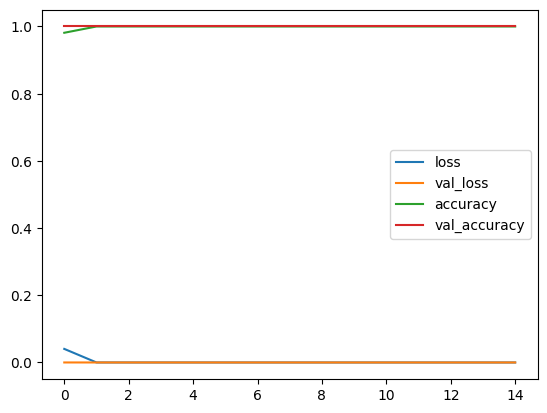

In [13]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
lstm_train_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']
plt.plot(lstm_train_loss)
plt.plot(lstm_val_loss)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

19976/19976 [==============================] - 98s 5ms/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]
[[319608      0]
 [     0 319608]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([319608, 319608]))
(1.0, 1.0, 1.0, None)


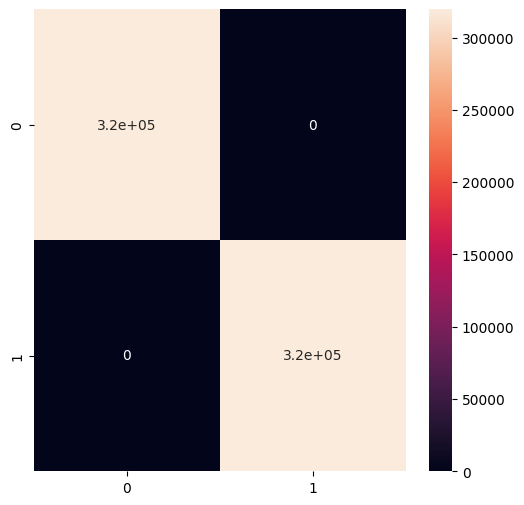

In [14]:
# Perfrom fault diagnosis and evaluate results
y_pred_vld0 = regressor.predict(X_vld)
y_pred0 = (y_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred_vld0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm0_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm0_vld)
print(accuracy_score(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm0_vld, annot=True)

In [15]:
import pickle
# save the model to disk
filename = 'Model/LSTM_model_HME2class.sav'
pickle.dump(regressor, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

2025-10-10 12:09:38.538647: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5437334400 exceeds 10% of free system memory.
2025-10-10 12:09:43.880321: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5437334400 exceeds 10% of free system memory.


49976/49976 [==============================] - 255s 5ms/step
[[0. 0.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [0. 0.]]
[[799606      2]
 [     0 799608]]
0.9999987493871997
(array([1.       , 0.9999975]), array([0.9999975, 1.       ]), array([0.99999875, 0.99999875]), array([799608, 799608]))
(0.9999987493903277, 0.9999987493871998, 0.9999987493871998, None)


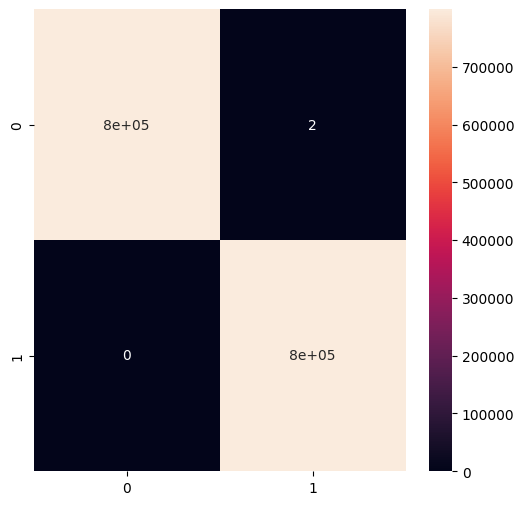

In [16]:
# Test diagnosis performance and evaluate results
y_pred_test0 = regressor.predict(X_test)
y_pred0 = (y_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred_test0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))


from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm0_test = confusion_matrix(y_test, y_pred_test01)
print(cm0_test)
print(accuracy_score(y_test, y_pred_test01)) 
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm0_test, annot=True)

### GRU

In [17]:
## Build and train the GRU model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Adding GRU layers and some Dropout regularisation
regressor1 = Sequential()
regressor1.add(GRU(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor1.add(Dropout(0.3))
regressor1.add(GRU(units = 128, return_sequences = True))
regressor1.add(Dropout(0.3))
regressor1.add(GRU(units = 64, return_sequences = True))
regressor1.add(Dropout(0.3))
regressor1.add(GRU(units = 32))
regressor1.add(Dropout(0.3))
regressor1.add(Dense(units = y_train.shape[1], activation='softmax')) # Output layer

# Compiling the GRU
regressor1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the GRU to the Training set
time_callback1=TimeHistory()
gru_history=regressor1.fit(X_train, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback1])
print(sum(time_callback1.times))

Epoch 1/15
750/750 [==============================] - 18s 20ms/step - loss: 0.0459 - accuracy: 0.9788 - val_loss: 4.4269e-05 - val_accuracy: 1.0000
Epoch 2/15
750/750 [==============================] - 13s 17ms/step - loss: 8.2961e-05 - accuracy: 1.0000 - val_loss: 9.8554e-06 - val_accuracy: 1.0000
Epoch 3/15
750/750 [==============================] - 13s 17ms/step - loss: 3.1115e-05 - accuracy: 1.0000 - val_loss: 4.1930e-06 - val_accuracy: 1.0000
Epoch 4/15
750/750 [==============================] - 13s 17ms/step - loss: 1.6163e-05 - accuracy: 1.0000 - val_loss: 2.1713e-06 - val_accuracy: 1.0000
Epoch 5/15
750/750 [==============================] - 13s 18ms/step - loss: 9.6721e-06 - accuracy: 1.0000 - val_loss: 1.2257e-06 - val_accuracy: 1.0000
Epoch 6/15
750/750 [==============================] - 13s 18ms/step - loss: 6.0671e-06 - accuracy: 1.0000 - val_loss: 7.1561e-07 - val_accuracy: 1.0000
Epoch 7/15
750/750 [==============================] - 13s 18ms/step - loss: 4.0071e-06 - acc

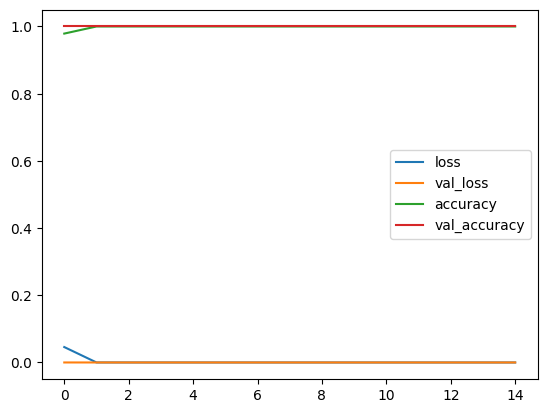

In [18]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
gru_train_loss = gru_history.history['loss']
gru_val_loss = gru_history.history['val_loss']
plt.plot(gru_train_loss)
plt.plot(gru_val_loss)
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

19976/19976 [==============================] - 110s 5ms/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]
[[319608      0]
 [     0 319608]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([319608, 319608]))
(1.0, 1.0, 1.0, None)


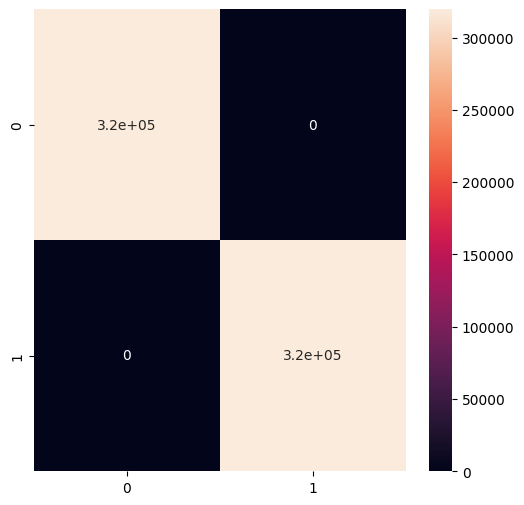

In [19]:
# Perfrom fault diagnosis and evaluate results
y2_pred_vld0 = regressor1.predict(X_vld)
y_pred0 = (y2_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))


from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm2_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm2_vld)
print(accuracy_score(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))#0.98

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm2_vld, annot=True)

In [20]:
import pickle
# save the model to disk
filename = 'Model/GRU_model_HME2class.sav'
pickle.dump(regressor1, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

2025-10-10 12:19:58.788837: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5437334400 exceeds 10% of free system memory.
2025-10-10 12:20:03.968997: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5437334400 exceeds 10% of free system memory.


49976/49976 [==============================] - 272s 5ms/step
[[0. 0.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [0. 0.]]
[[799608      0]
 [     0 799608]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([799608, 799608]))
(1.0, 1.0, 1.0, None)


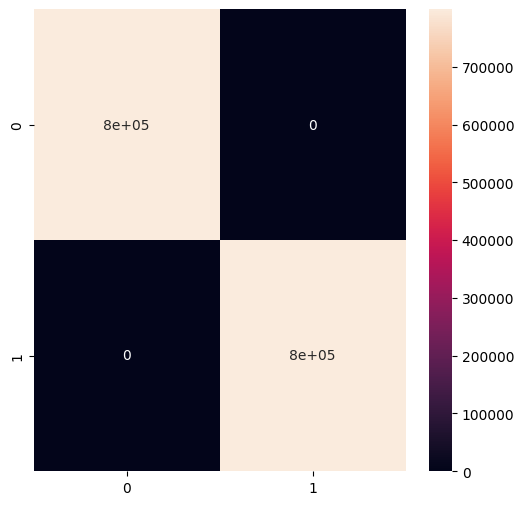

In [21]:
# Test diagnosis performance and evaluate results
y2_pred_test0 = regressor1.predict(X_test)
y_pred0 = (y2_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm2_test = confusion_matrix(y_test, y_pred_test01)
print(cm2_test)
print(accuracy_score(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm2_test, annot=True)

### 2D CNN

In [22]:
# Reconstruct datasets for CNN architecture input
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2], 1))
X_vld1 = np.reshape(X_vld, (X_vld.shape[0], X_vld.shape[1],X_vld.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],X_test.shape[2], 1))
print(X_train1.shape)
print(X_vld1.shape)
print(X_test1.shape)

(959216, 50, 17, 1)
(639216, 50, 17, 1)
(1599216, 50, 17, 1)


In [23]:
# Build and train the CNN model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Adding onvolutional layers and some Dropout regularisation
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),activation='relu', input_shape=(X_train1.shape[1],X_train1.shape[2],X_train1.shape[3])))
cnn.add(tf.keras.layers.Dropout(0.1)) 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1)) 

cnn.add(tf.keras.layers.Flatten()) # Flattening

cnn.add(tf.keras.layers.Dense(units=64, activation='relu')) # Full connection
cnn.add(tf.keras.layers.Dropout(0.1)) 
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1)) 

cnn.add(tf.keras.layers.Dense(units=y_train.shape[1],activation='softmax')) # Output layer

# Compiling the CNN
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the CNN to the Training set
time_callback2=TimeHistory()
cnn_history=cnn.fit(X_train1, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback2])
print(sum(time_callback2.times))

Epoch 1/15


2025-10-10 12:24:55.209572: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


750/750 [==============================] - 20s 24ms/step - loss: 0.0698 - accuracy: 0.9672 - val_loss: 2.3543e-06 - val_accuracy: 1.0000
Epoch 2/15
750/750 [==============================] - 17s 22ms/step - loss: 5.4363e-05 - accuracy: 1.0000 - val_loss: 6.0022e-07 - val_accuracy: 1.0000
Epoch 3/15
750/750 [==============================] - 16s 22ms/step - loss: 1.7595e-05 - accuracy: 1.0000 - val_loss: 4.1216e-08 - val_accuracy: 1.0000
Epoch 4/15
750/750 [==============================] - 16s 22ms/step - loss: 0.0424 - accuracy: 0.9886 - val_loss: 3.7166e-05 - val_accuracy: 1.0000
Epoch 5/15
750/750 [==============================] - 16s 22ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 4.4958e-05 - val_accuracy: 1.0000
Epoch 6/15
750/750 [==============================] - 16s 22ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 5.6375e-05 - val_accuracy: 1.0000
Epoch 7/15
750/750 [==============================] - 17s 22ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 3

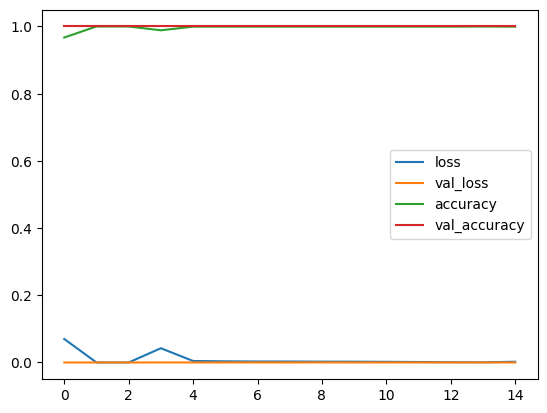

In [24]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']
plt.plot(cnn_train_loss)
plt.plot(cnn_val_loss)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

19976/19976 [==============================] - 19s 948us/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]
[[319608      0]
 [     0 319608]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([319608, 319608]))
(1.0, 1.0, 1.0, None)


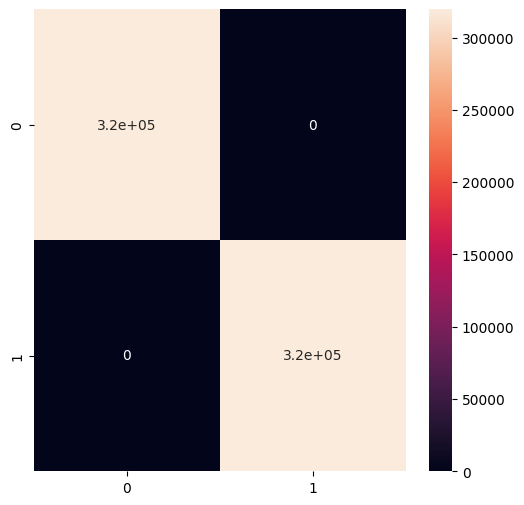

In [25]:
# Perfrom fault diagnosis and evaluate results
y3_pred_vld0 = cnn.predict(X_vld1)
y_pred0 = (y3_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm3_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm3_vld)
print(accuracy_score(y_vld, y_pred_vld01)) 
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))#0.96

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm3_vld, annot=True)

In [26]:
import pickle
# save the model to disk
filename = 'Model/CNN_model_HME2class.sav'
pickle.dump(cnn, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

2025-10-10 12:29:38.146821: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5437334400 exceeds 10% of free system memory.


49976/49976 [==============================] - 48s 956us/step
[[0. 0.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [0. 0.]]
[[799608      0]
 [     0 799608]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([799608, 799608]))
(1.0, 1.0, 1.0, None)


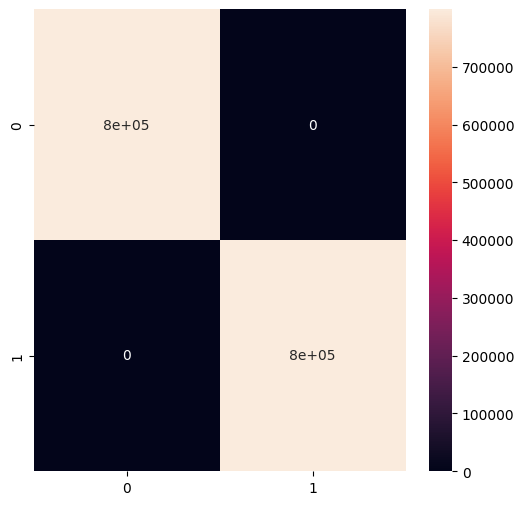

In [27]:
# Test diagnosis performance and evaluate results
y3_pred_test0 = cnn.predict(X_test1)
y_pred0 = (y3_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm3_test = confusion_matrix(y_test, y_pred_test01)
print(cm3_test)
print(accuracy_score(y_test, y_pred_test01))#0.78
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))#0.72

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm3_test, annot=True)

In [28]:
## Save training and validation history
import pandas as pd
history = pd.DataFrame({'LSTM Training Loss':lstm_history.history['loss'], 'LSTM Validation Loss':lstm_history.history['val_loss'],
                        'LSTM Training Accuracy':lstm_history.history['accuracy'], 'LSTM Validation Accuracy':lstm_history.history['val_accuracy'],
                        'GRU Training Loss':gru_history.history['loss'], 'GRU Validation Loss':gru_history.history['val_loss'],
                        'GRU Training Accuracy':gru_history.history['accuracy'], 'GRU Validation Accuracy':gru_history.history['val_accuracy'],
                        'CNN Training Loss':cnn_history.history['loss'], 'CNN Validation Loss':cnn_history.history['val_loss'],
                        'CNN Training Accuracy':cnn_history.history['accuracy'], 'CNN Validation Accuracy':cnn_history.history['val_accuracy'],
                       })
history.to_csv('History/History_HME2class.csv')
history

,LSTM Training Loss,LSTM Validation Loss,LSTM Training Accuracy,LSTM Validation Accuracy,GRU Training Loss,GRU Validation Loss,GRU Training Accuracy,GRU Validation Accuracy,CNN Training Loss,CNN Validation Loss,CNN Training Accuracy,CNN Validation Accuracy
0,4.041267e-02,5.789771e-05,0.981258,1.0,4.589867e-02,4.426890e-05,0.978834,1.0,0.069845,2.354339e-06,0.967193,1.0
1,5.443316e-05,1.181951e-05,1.000000,1.0,8.296078e-05,9.855424e-06,1.000000,1.0,0.000054,6.002182e-07,0.999995,1.0
2,1.911795e-05,5.038019e-06,1.000000,1.0,3.111536e-05,4.192964e-06,1.000000,1.0,0.000018,4.121595e-08,0.999999,1.0
3,1.008842e-05,2.692551e-06,1.000000,1.0,1.616298e-05,2.171284e-06,1.000000,1.0,0.042407,3.716632e-05,0.988633,1.0
4,6.159472e-06,1.601814e-06,1.000000,1.0,9.672068e-06,1.225681e-06,1.000000,1.0,0.004430,4.495754e-05,0.999501,1.0
5,3.980930e-06,1.004960e-06,1.000000,1.0,6.067141e-06,7.156142e-07,1.000000,1.0,0.003465,5.637481e-05,0.999501,1.0
6,2.669956e-06,6.222024e-07,1.000000,1.0,4.007086e-06,4.236489e-07,1.000000,1.0,0.002883,3.902085e-05,0.999500,1.0
7,1.812502e-06,4.217021e-07,1.000000,1.0,2.633034e-06,2.631261e-07,1.000000,1.0,0.002829,1.660492e-05,0.999463,1.0
8,1.235943e-06,2.988733e-07,1.000000,1.0,1.808326e-06,1.498840e-07,1.000000,1.0,0.002473,1.333012e-04,0.999507,1.0
9,8.395070e-07,1.792240e-07,1.000000,1.0,1.225248e-06,1.200854e-07,1.000000,1.0,0.002355,2.051086e-05,0.999480,1.0


## Module 2: Electrical Fault Diagnosis

In [29]:
%reset -f  

In [30]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

### Data processing

In [31]:
## determine train and validate ratio
rt = 0.6 # training ratio
rv = 1-rt # validation ratio

In [32]:
## Read filename from the folder
## We will use testing sets 0 and 1 to build machine learning models (train and validate), 
## and other testing sets from another experiment to test the diagnosis performance.
## We don't load healthy and mechanical fault in this case, 
## because the number of test files is leveraged when constructing input dataset
import os 
from pprint import pprint 
file2=[]
file2_test=[]
root='/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT'
for dirname, dirnames, filenames in os.walk(root):
    # print path to all subdirectories first.
    for filename in filenames:         
        if 'State' in filename: #for testing
            continue  
        if 'Baseline' in filename: # not loading healthy and mechanical fault datasets
            continue
        if 'Mechanical' in filename:
            continue
        if 'Loaded_' in filename: # loaded baseline
            continue
        file2.append(os.path.join(dirname, filename))

for dirname, dirnames, filenames in os.walk(root):
    for filename in filenames:
        if 'Baseline' in filename:
            continue
        if 'Mechanical' in filename:
            continue
        if 'State' in filename: 
            file2_test.append(os.path.join(dirname, filename))
print(file2)
print(len(file2))
print(file2_test)
print(len(file2_test))

['/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Broken Rotor Bar_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/A-B_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Broken Rotor Bar_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Broken Rotor Bar_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Broken Rotor Bar_test0_FFT05V

In [33]:
## Data loading and labeling for electrical fault Diagnosis
## 0 - A-B short circuit
## 1 - broken rotor bar
## only use 10 seconds of the dataset
import pandas as pd
import numpy as np

col=list(range(3,13)) # Only input raw current signals and electrical fault related FFT components 
col.extend([17])
train=[]
validate=[]
test=[]
file=file2.copy()
for i in range(0,len(file)):
    if 'Baseline' in file[i]:
        continue
    elif 'A-B' in file[i]:
        t=0
    elif 'Broken' in file[i]:
        t=1
    elif 'Mechanical' in file[i]:
        continue
    else:
        continue
    print(file[i])
    df=pd.read_csv(file[i])
    df_type=pd.DataFrame(np.ones(len(df))*t,columns=['type'])
    df2=pd.concat([df,df_type.astype(int)],axis=1)
    df2=df2.iloc[:10000*10,col]
    print(t,len(df2),len(df2.columns))
    if len(train)==0: 
        train=df2.iloc[:int(len(df2)*rt)] 
        validate=df2.iloc[int(len(df2)*rt):]
    else:
        train=pd.concat([train,df2.iloc[:int(len(df2)*rt)]],axis=0)
        validate=pd.concat([validate,df2.iloc[int(len(df2)*rt):]],axis=0)
file=file2_test.copy()
for i in range(0,len(file)):
    if 'Baseline' in file[i]:
        continue
    elif 'A-B' in file[i]:
        t=0
    elif 'Broken' in file[i]:
        t=1
    elif 'Mechanical' in file[i]:
        continue
    else:
        continue
    print(file[i])
    df=pd.read_csv(file[i])
    df_type=pd.DataFrame(np.ones(len(df))*t,columns=['type'])
    df2=pd.concat([df,df_type.astype(int)],axis=1)
    df2=df2.iloc[:10000*10,col]
    print(t,len(df2),len(df2.columns))
    if len(test)==0: 
        test=df2
    else:
        test=pd.concat([test,df2],axis=0)
print(len(train))
print(len(validate))
print(len(test))

/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test0_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 11
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 11
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Broken Rotor Bar_test1_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 11
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/A-B_test1_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 11
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/A-B_test0_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 11
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Broken Rotor Bar_test1_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 11
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Broken Rotor Bar_test0_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 11
/home/jingyi/Jy/Condition Monitoring/

In [34]:
print(len(train[train.type==0]))
print(len(train[train.type==1]))
print(len(train[train.type==2]))
print(len(train[train.type==3]))

240000
240000
0
0


In [35]:
print(train)
print(validate)
print(test)

           CT 1      CT 2      CT 3      60 A      60 B      60 C      58 A  \
0     -2.439337  1.210260  3.726473  5.427107  4.438795  3.830687  0.030998   
1     -2.267275  1.372309  3.713589  5.427097  4.438806  3.830695  0.030989   
2     -2.002382  1.558104  3.666353  5.427087  4.438819  3.830707  0.030981   
3     -1.776476  1.744976  3.614845  5.427069  4.438836  3.830712  0.030966   
4     -1.617880  1.901941  3.585873  5.427057  4.438855  3.830720  0.030956   
...         ...       ...       ...       ...       ...       ...       ...   
59995 -0.708113  2.156677  2.894154  2.768609  2.770998  2.889794  0.045201   
59996 -0.555935  2.227945  2.834625  2.768621  2.771012  2.889876  0.045226   
59997 -0.434513  2.294598  2.768497  2.768627  2.771033  2.889944  0.045237   
59998 -0.348053  2.367592  2.739182  2.768630  2.771065  2.890012  0.045246   
59999 -0.223036  2.423172  2.678089  2.768633  2.771111  2.890088  0.045254   

           62 A      56 A      64 A  type  
0      

In [36]:
## Data normalization
import math
V_base=120
I_base=373/V_base/math.sqrt(3)
rate_voltage=V_base
rate_current=I_base
rate_Coef=I_base # We also use the I base (rated current) for fundamental FFT components normalization

print(rate_voltage)
print(rate_current)
print(rate_Coef)

coln = len(train.columns)
XX=train.iloc[:,0:coln-1].values
YY=train.iloc[:,coln-1].values
XX_vld=validate.iloc[:,0:coln-1].values
YY_vld=validate.iloc[:,coln-1].values
XX_test=test.iloc[:,0:coln-1].values
YY_test=test.iloc[:,coln-1].values
XX[:,0:6]=XX[:,0:6]/rate_current # Only normalizing fundamental components
XX[:,6:10]=np.log(XX[:,6:10]) # Calculate natural logarithm of other FFT components
XX_vld[:,0:6]=XX_vld[:,0:6]/rate_current
XX_vld[:,6:10]=np.log(XX_vld[:,6:10])
XX_test[:,0:6]=XX_test[:,0:6]/rate_current
XX_test[:,6:10]=np.log(XX_test[:,6:10])
print(XX)
print(XX_vld)
print(XX_test)

120
1.794597086731087
1.794597086731087
[[-1.3592671   0.67439115  2.07649554 ... -3.67240484 -3.72275585
  -4.30797321]
 [-1.26338936  0.76468904  2.06931614 ... -3.67208129 -3.72318943
  -4.30720944]
 [-1.11578376  0.86821915  2.0429952  ... -3.67177745 -3.72360996
  -4.30647499]
 ...
 [-0.24212292  1.27861437  1.5426847  ... -3.67590864 -3.51044018
  -3.94873323]
 [-0.19394491  1.31928881  1.52634903 ... -3.67550639 -3.5106766
  -3.94903985]
 [-0.12428183  1.35025963  1.49230664 ... -3.67511846 -3.51085585
  -3.94935646]]
[[-0.13880007  1.48884713  1.68466262 ... -3.61805221 -4.49415726
  -4.33606448]
 [-0.03567915  1.57187528  1.64204321 ... -3.61757852 -4.49082375
  -4.33490597]
 [ 0.05491103  1.64485439  1.61464881 ... -3.61737372 -4.4887397
  -4.33437226]
 ...
 [ 0.14636209  1.47327138  1.33364231 ... -3.60934931 -3.5321734
  -4.01530738]
 [ 0.19066609  1.47841016  1.28564498 ... -3.60943038 -3.53217316
  -4.01521688]
 [ 0.2335087   1.48866645  1.25016777 ... -3.6090856  -3.5321

In [37]:
## Transform the dataset for RNN architecture input
ts=50 # Sliding window 
len_train = int(len(df2)*rt)
len_vld = int(len(df2)*rv)
len_test = int(len(df2))
n_file = len(file2)
n_file_test = len(file2_test)

def struct(X,Y,length,number_file):
    X3D=np.zeros((len(X)-(ts-1)*number_file,ts,X.shape[1]),dtype=float)
    for j in range (0, X.shape[1]):
        X2D=[]  
        
        for i in range(0, number_file):
            for k in range(0, length-ts+1):
                X2D.append(X[i*length+k:i*length+k+ts,j])
        X2D = np.array(X2D)  
        X3D[:,:,j]=X2D 
        
    Y1D=np.zeros((len(X)-(ts-1)*number_file,),dtype=float)
    for i in range(0, number_file):
        Y1D[i*(length-(ts-1)):(i+1)*(length-(ts-1))] = Y[i*length+ts-1:(i+1)*length]
    return X3D,Y1D

X,y=struct(XX,YY,len_train,n_file)
X_vld,y_vld=struct(XX_vld,YY_vld,len_vld,n_file)
X_test,y_test=struct(XX_test,YY_test,len_test,n_file_test)

print(X.shape)
print(y.shape)
print(X_vld.shape)
print(y_vld.shape)
print(X_test.shape)
print(y_test.shape)

(479608, 50, 10)
(479608,)
(319608, 50, 10)
(319608,)
(799608, 50, 10)
(799608,)


In [38]:
# Balance the training data 
# Shuffle all datasets
from collections import Counter
import imblearn.over_sampling 
from sklearn.utils import shuffle
from keras.utils import to_categorical
oversample1=imblearn.over_sampling.RandomOverSampler(sampling_strategy='not majority')
oversample1.fit_resample(X[:,:,0],y)
X_train=X[oversample1.sample_indices_]
y_train=y[oversample1.sample_indices_]
X_train, y_train = shuffle(X_train, y_train)
X_vld, y_vld = shuffle(X_vld, y_vld)
X_test, y_test = shuffle(X_test, y_test)
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))
print(X_train.shape)
print(X_vld.shape)
print(X_test.shape)

# Convert the training int class vectors to binary class matrices
y_train = to_categorical(y_train) 

Counter({0.0: 239804, 1.0: 239804})
Counter({1.0: 239804, 0.0: 239804})
Counter({0.0: 399804, 1.0: 399804})
(479608, 50, 10)
(319608, 50, 10)
(799608, 50, 10)


In [39]:
## To record computation time
import time
import keras

class TimeHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.times = []
 
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
 
    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

### LSTM

In [40]:
## Build and train the LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Adding LSTM layers and some Dropout regularisation
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = y_train.shape[1], activation='softmax')) # Output layer

# Defining learning rate
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.CosineDecay(
                initial_learning_rate,
                decay_steps=10000,
                alpha=0.1)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling the LSTM
regressor.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the LSTM to the Training set
time_callback=TimeHistory()
lstm_history=regressor.fit(X_train, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback])
print(sum(time_callback.times))

Epoch 1/15
375/375 [==============================] - 11s 21ms/step - loss: 0.0237 - accuracy: 0.9960 - val_loss: 3.5618e-04 - val_accuracy: 1.0000
Epoch 2/15
375/375 [==============================] - 7s 19ms/step - loss: 3.3045e-04 - accuracy: 1.0000 - val_loss: 1.0822e-04 - val_accuracy: 1.0000
Epoch 3/15
375/375 [==============================] - 7s 19ms/step - loss: 1.4481e-04 - accuracy: 1.0000 - val_loss: 5.7200e-05 - val_accuracy: 1.0000
Epoch 4/15
375/375 [==============================] - 7s 19ms/step - loss: 8.8590e-05 - accuracy: 1.0000 - val_loss: 3.6069e-05 - val_accuracy: 1.0000
Epoch 5/15
375/375 [==============================] - 7s 19ms/step - loss: 6.0398e-05 - accuracy: 1.0000 - val_loss: 2.4448e-05 - val_accuracy: 1.0000
Epoch 6/15
375/375 [==============================] - 7s 19ms/step - loss: 4.3642e-05 - accuracy: 1.0000 - val_loss: 1.7320e-05 - val_accuracy: 1.0000
Epoch 7/15
375/375 [==============================] - 7s 19ms/step - loss: 3.2378e-05 - accuracy:

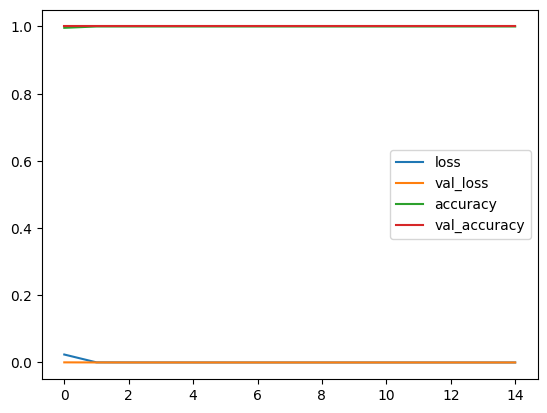

In [41]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
lstm_train_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']
plt.plot(lstm_train_loss)
plt.plot(lstm_val_loss)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

9988/9988 [==============================] - 60s 6ms/step
[[0. 0.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[159804      0]
 [     0 159804]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([159804, 159804]))
(1.0, 1.0, 1.0, None)


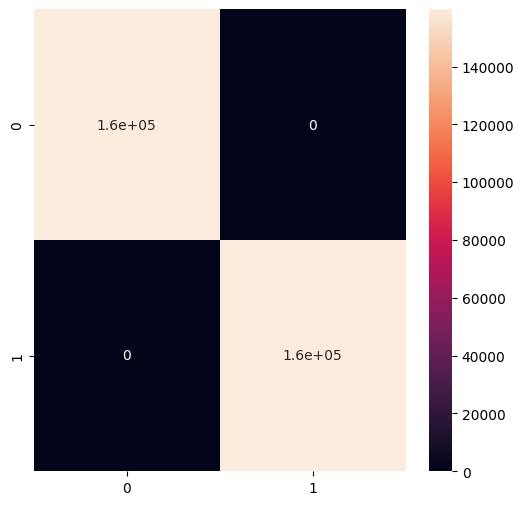

In [42]:
# Perfrom fault diagnosis and evaluate results
y_pred_vld0 = regressor.predict(X_vld)
y_pred0 = (y_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred_vld0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm0_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm0_vld)
print(accuracy_score(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm0_vld, annot=True)

In [43]:
import pickle
# save the model to disk
filename = 'Model/LSTM_model_EB2class.sav'
pickle.dump(regressor, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

24988/24988 [==============================] - 149s 6ms/step
[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [1. 1.]
 [0. 0.]]
[[399804      0]
 [     0 399804]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([399804, 399804]))
(1.0, 1.0, 1.0, None)


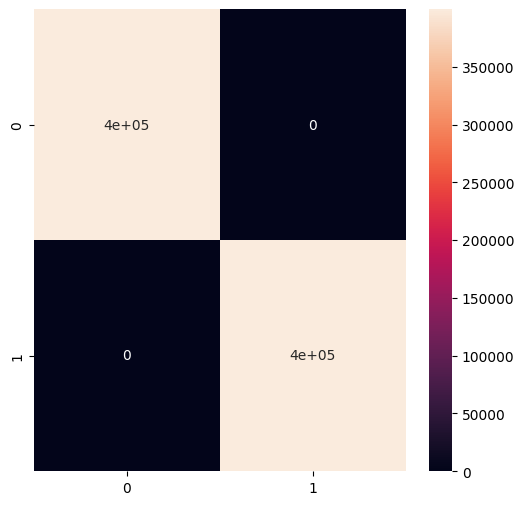

In [44]:
# Test diagnosis performance and evaluate results
y_pred_test0 = regressor.predict(X_test)
y_pred0 = (y_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred_test0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm0_test = confusion_matrix(y_test, y_pred_test01)
print(cm0_test)
print(accuracy_score(y_test, y_pred_test01)) 
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm0_test, annot=True)

### GRU

In [45]:
## Build and train the GRU model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Adding GRU layers and some Dropout regularisation
regressor1 = Sequential()
regressor1.add(GRU(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor1.add(Dropout(0.3))
regressor1.add(GRU(units = 128, return_sequences = True))
regressor1.add(Dropout(0.3))
regressor1.add(GRU(units = 64, return_sequences = True))
regressor1.add(Dropout(0.3))
regressor1.add(GRU(units = 32))
regressor1.add(Dropout(0.3))
regressor1.add(Dense(units = y_train.shape[1], activation='softmax')) # output layer

# Defining learning rate
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.CosineDecay(
                initial_learning_rate,
                decay_steps=10000,
                alpha=0.1)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling the GRU
regressor1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the GRU to the Training set
time_callback1=TimeHistory()
gru_history=regressor1.fit(X_train, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback1])
print(sum(time_callback1.times))

Epoch 1/15
375/375 [==============================] - 10s 21ms/step - loss: 0.0210 - accuracy: 0.9924 - val_loss: 2.3997e-05 - val_accuracy: 1.0000
Epoch 2/15
375/375 [==============================] - 7s 18ms/step - loss: 9.3546e-05 - accuracy: 1.0000 - val_loss: 1.1392e-05 - val_accuracy: 1.0000
Epoch 3/15
375/375 [==============================] - 7s 18ms/step - loss: 5.3690e-05 - accuracy: 1.0000 - val_loss: 6.8116e-06 - val_accuracy: 1.0000
Epoch 4/15
375/375 [==============================] - 7s 18ms/step - loss: 3.5009e-05 - accuracy: 1.0000 - val_loss: 4.5833e-06 - val_accuracy: 1.0000
Epoch 5/15
375/375 [==============================] - 7s 18ms/step - loss: 2.5490e-05 - accuracy: 1.0000 - val_loss: 3.3105e-06 - val_accuracy: 1.0000
Epoch 6/15
375/375 [==============================] - 7s 18ms/step - loss: 1.9345e-05 - accuracy: 1.0000 - val_loss: 2.4880e-06 - val_accuracy: 1.0000
Epoch 7/15
375/375 [==============================] - 7s 18ms/step - loss: 1.5322e-05 - accuracy:

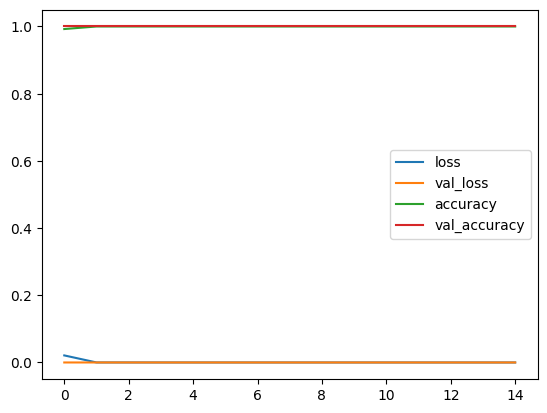

In [46]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
gru_train_loss = gru_history.history['loss']
gru_val_loss = gru_history.history['val_loss']
plt.plot(gru_train_loss)
plt.plot(gru_val_loss)
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

9988/9988 [==============================] - 57s 6ms/step
[[0. 0.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[159804      0]
 [     0 159804]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([159804, 159804]))
(1.0, 1.0, 1.0, None)


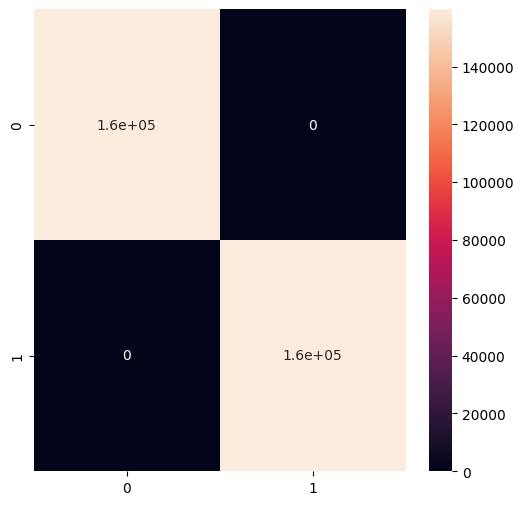

In [47]:
# Perfrom fault diagnosis and evaluate results
y2_pred_vld0 = regressor1.predict(X_vld)
y_pred0 = (y2_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm2_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm2_vld)
print(accuracy_score(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm2_vld, annot=True)

In [48]:
import pickle
# save the model to disk
filename = 'Model/GRU_model_EB2class.sav'
pickle.dump(regressor1, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

24988/24988 [==============================] - 139s 6ms/step
[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [1. 1.]
 [0. 0.]]
[[399804      0]
 [     0 399804]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([399804, 399804]))
(1.0, 1.0, 1.0, None)


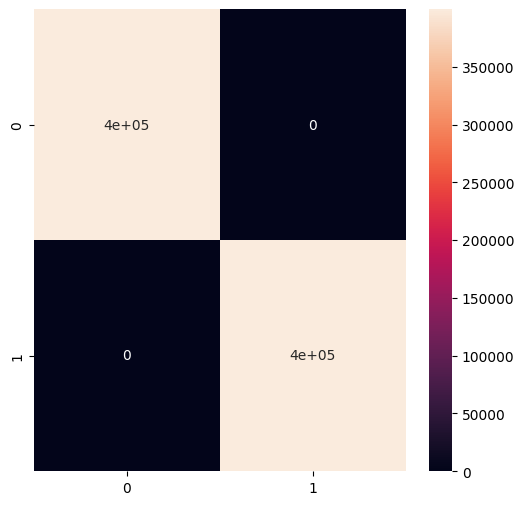

In [49]:
# Test diagnosis performance and evaluate results
y2_pred_test0 = regressor1.predict(X_test)
y_pred0 = (y2_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm2_test = confusion_matrix(y_test, y_pred_test01)
print(cm2_test)
print(accuracy_score(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm2_test, annot=True)

### 2D CNN

In [50]:
# Reconstruct datasets for CNN architecture input
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2], 1))
X_vld1 = np.reshape(X_vld, (X_vld.shape[0], X_vld.shape[1],X_vld.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],X_test.shape[2], 1))
print(X_train1.shape)
print(X_vld1.shape)
print(X_test1.shape)

(479608, 50, 10, 1)
(319608, 50, 10, 1)
(799608, 50, 10, 1)


In [51]:
# Build and train the CNN model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Adding onvolutional layers and some Dropout regularisation
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),activation='relu', input_shape=(X_train1.shape[1],X_train1.shape[2],X_train1.shape[3])))
cnn.add(tf.keras.layers.Dropout(0.1))  
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))  

cnn.add(tf.keras.layers.Flatten()) # Flattening

cnn.add(tf.keras.layers.Dense(units=64, activation='relu')) # Full connection
cnn.add(tf.keras.layers.Dropout(0.1))  
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))  

cnn.add(tf.keras.layers.Dense(units=y_train.shape[1],activation='softmax')) # Output layer

# Defining learning rate
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.CosineDecay(
                initial_learning_rate,
                decay_steps=10000,
                alpha=0.1)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling the CNN
cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the CNN to the Training set
time_callback2=TimeHistory()
cnn_history=cnn.fit(X_train1, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback2])
print(sum(time_callback2.times))

Epoch 1/15


2025-10-10 12:42:07.630943: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_20/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 7s 16ms/step - loss: 0.0164 - accuracy: 0.9924 - val_loss: 2.6217e-07 - val_accuracy: 1.0000
Epoch 2/15
375/375 [==============================] - 5s 13ms/step - loss: 4.2330e-05 - accuracy: 1.0000 - val_loss: 3.6065e-09 - val_accuracy: 1.0000
Epoch 3/15
375/375 [==============================] - 5s 14ms/step - loss: 2.0242e-05 - accuracy: 1.0000 - val_loss: 2.7689e-09 - val_accuracy: 1.0000
Epoch 4/15
375/375 [==============================] - 5s 14ms/step - loss: 2.2719e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
375/375 [==============================] - 5s 13ms/step - loss: 1.9429e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
375/375 [==============================] - 5s 14ms/step - loss: 1.3852e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
375/375 [==============================] - 5s 14ms/step - loss: 8.4878e-06 - accuracy: 1.0000 - va

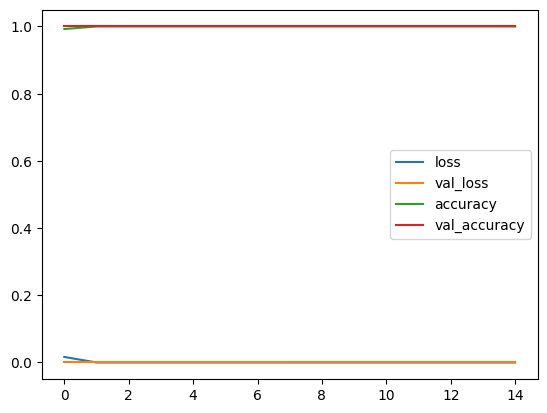

In [52]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']
plt.plot(cnn_train_loss)
plt.plot(cnn_val_loss)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

9988/9988 [==============================] - 7s 735us/step
[[0. 0.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[159804      0]
 [     0 159804]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([159804, 159804]))
(1.0, 1.0, 1.0, None)


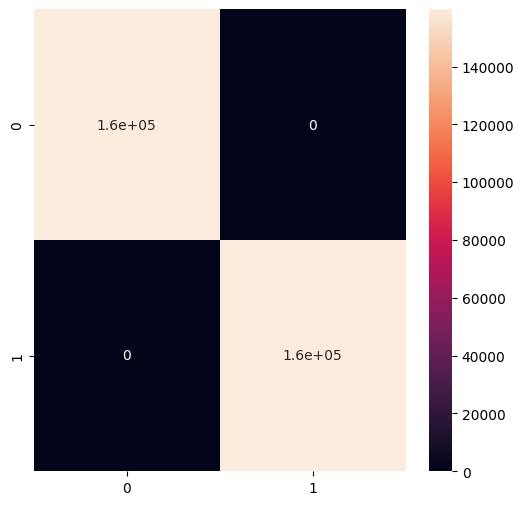

In [53]:
# Perfrom fault diagnosis and evaluate results
y3_pred_vld0 = cnn.predict(X_vld1)
y_pred0 = (y3_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm3_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm3_vld)
print(accuracy_score(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm3_vld, annot=True)

In [54]:
import pickle
# save the model to disk
filename = 'Model/CNN_model_EB2class.sav'
pickle.dump(cnn, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

24988/24988 [==============================] - 21s 845us/step
[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [1. 1.]
 [0. 0.]]
[[399804      0]
 [     0 399804]]
1.0
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([399804, 399804]))
(1.0, 1.0, 1.0, None)


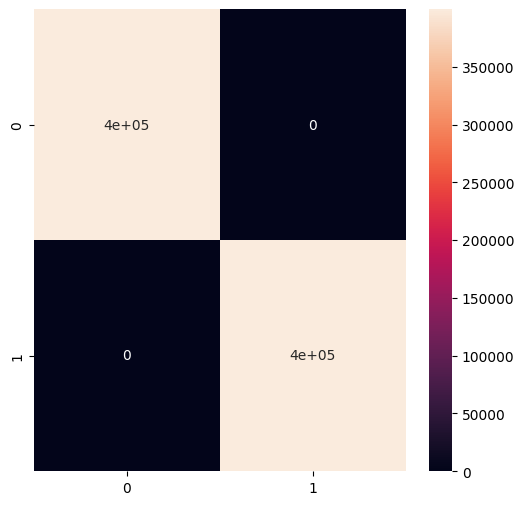

In [55]:
# Test diagnosis performance and evaluate results
y3_pred_test0 = cnn.predict(X_test1)
y_pred0 = (y3_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm3_test = confusion_matrix(y_test, y_pred_test01)
print(cm3_test)
print(accuracy_score(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm3_test, annot=True)

In [56]:
## Save training and validation history
import pandas as pd
history = pd.DataFrame({'LSTM Training Loss':lstm_history.history['loss'], 'LSTM Validation Loss':lstm_history.history['val_loss'],
                        'LSTM Training Accuracy':lstm_history.history['accuracy'], 'LSTM Validation Accuracy':lstm_history.history['val_accuracy'],
                        'GRU Training Loss':gru_history.history['loss'], 'GRU Validation Loss':gru_history.history['val_loss'],
                        'GRU Training Accuracy':gru_history.history['accuracy'], 'GRU Validation Accuracy':gru_history.history['val_accuracy'],
                        'CNN Training Loss':cnn_history.history['loss'], 'CNN Validation Loss':cnn_history.history['val_loss'],
                        'CNN Training Accuracy':cnn_history.history['accuracy'], 'CNN Validation Accuracy':cnn_history.history['val_accuracy'],
                       })
history.to_csv('History/HistoryAll_EB2class.csv')
history

,LSTM Training Loss,LSTM Validation Loss,LSTM Training Accuracy,LSTM Validation Accuracy,GRU Training Loss,GRU Validation Loss,GRU Training Accuracy,GRU Validation Accuracy,CNN Training Loss,CNN Validation Loss,CNN Training Accuracy,CNN Validation Accuracy
0,0.023698,0.000356,0.995984,1.0,0.021032,2.399693e-05,0.992366,1.0,1.644986e-02,2.621704e-07,0.992369,1.0
1,0.000330,0.000108,1.000000,1.0,0.000094,1.139182e-05,1.000000,1.0,4.232959e-05,3.606528e-09,1.000000,1.0
2,0.000145,0.000057,1.000000,1.0,0.000054,6.811575e-06,1.000000,1.0,2.024160e-05,2.768898e-09,1.000000,1.0
3,0.000089,0.000036,1.000000,1.0,0.000035,4.583297e-06,1.000000,1.0,2.271926e-05,0.000000e+00,0.999997,1.0
4,0.000060,0.000024,1.000000,1.0,0.000025,3.310530e-06,1.000000,1.0,1.942854e-05,0.000000e+00,0.999995,1.0
5,0.000044,0.000017,1.000000,1.0,0.000019,2.487997e-06,1.000000,1.0,1.385192e-05,0.000000e+00,1.000000,1.0
6,0.000032,0.000013,1.000000,1.0,0.000015,1.926942e-06,1.000000,1.0,8.487807e-06,0.000000e+00,0.999995,1.0
7,0.000025,0.000010,1.000000,1.0,0.000012,1.517871e-06,1.000000,1.0,1.363507e-06,0.000000e+00,1.000000,1.0
8,0.000020,0.000007,1.000000,1.0,0.000010,1.214157e-06,1.000000,1.0,3.208241e-06,0.000000e+00,1.000000,1.0
9,0.000016,0.000006,1.000000,1.0,0.000008,9.939040e-07,1.000000,1.0,1.364181e-06,0.000000e+00,1.000000,1.0


## Module 3: Mechanical Fault Detection

In [1]:
%reset -f  

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

### Data Processing

In [3]:
## determine train and validate ratio
rt = 0.6 # training ratio
rv = 1-rt # validation ratio

In [4]:
## Read filename from the folder
## We will use testing sets 0 and 1 to build machine learning models (train and validate), 
## and other testing sets from another experiment to test the diagnosis performance.
## We don't load healthy and mechanical fault in this case, 
## because the number of test files is leveraged when constructing input dataset
import os 
from pprint import pprint 
file2=[]
file2_test=[]
root='/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT'
for dirname, dirnames, filenames in os.walk(root):
    # print path to all subdirectories first.
    for filename in filenames:         
        if 'State' in filename: #for testing
            continue  
        if 'A-B' in filename: # not loading electrical faults
            continue
        if 'Broken' in filename:
            continue
        file2.append(os.path.join(dirname, filename))

for dirname, dirnames, filenames in os.walk(root):
    for filename in filenames:
        if 'A-B' in filename: # not loading electrical faults
            continue
        if 'Broken' in filename:
            continue
        if 'State' in filename: 
            file2_test.append(os.path.join(dirname, filename))
print(file2)
print(len(file2))
print(file2_test)
print(len(file2_test))

['/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Baseline_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Mechanical Unbalance_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Mechanical Unbalance_test1_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded_test0_FFT05VI-ABC60A24-112-118_noindex.csv', '/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Bas

In [5]:
## Data loading and labeling for mechanical fault detection
## 0 - there is no mechanical fault
## 1 - there is mechanical fault
## only use 10 seconds of the dataset
import pandas as pd
import numpy as np

col=list(range(3,6)) # Only input raw current signals and mechanical fault related FFT components 
col.extend(list(range(13,18)))
train=[]
validate=[]
test=[]
file=file2.copy()
for i in range(0,len(file)):
    if 'Baseline' in file[i]:
        t=0
    elif 'Mechanical' in file[i]:
        t=1
    else:
        t=0
    print(file[i])
    df=pd.read_csv(file[i])
    df_type=pd.DataFrame(np.ones(len(df))*t,columns=['type'])
    df2=pd.concat([df,df_type.astype(int)],axis=1)

    df2=df2.iloc[:10000*10,col]
    print(t,len(df2),len(df2.columns))
    if len(train)==0: 
        train=df2.iloc[:int(len(df2)*rt)] #rt:training ratio
        validate=df2.iloc[int(len(df2)*rt):]
    else:
        train=pd.concat([train,df2.iloc[:int(len(df2)*rt)]],axis=0)
        validate=pd.concat([validate,df2.iloc[int(len(df2)*rt):]],axis=0)
        
file=file2_test.copy()
for i in range(0,len(file)):
    if 'Baseline' in file[i]:
        t=0
    elif 'Mechanical' in file[i]:
        t=1
    else:
        t=0
    print(file[i])
    df=pd.read_csv(file[i])
    df_type=pd.DataFrame(np.ones(len(df))*t,columns=['type'])
    df2=pd.concat([df,df_type.astype(int)],axis=1)
    df2=df2.iloc[:10000*10,col]
    print(t,len(df2),len(df2.columns))
    if len(test)==0: 
        test=df2
    else:
        test=pd.concat([test,df2],axis=0)
print(len(train))
print(len(validate))
print(len(test))

/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test1_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 8
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded Mechanical Unbalance_test0_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 8
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Baseline_test1_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 8
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded_test1_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 8
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Mechanical Unbalance_test0_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 8
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Mechanical Unbalance_test1_FFT05VI-ABC60A24-112-118_noindex.csv
1 100000 8
/home/jingyi/Jy/Condition Monitoring/FM_UTD/FM_UTDallas/FM Motor FFT/Loaded_test0_FFT05VI-ABC60A24-112-118_noindex.csv
0 100000 8
/home/jingyi/Jy/Co

In [6]:
print(len(train[train.type==0]))
print(len(train[train.type==1]))
print(len(train[train.type==2]))
print(len(train[train.type==3]))

240000
240000
0
0


In [7]:
print(train)
print(validate)
print(test)

           CT 1      CT 2      CT 3    112 IA    114 IA    116 IA    118 IA  \
0     -3.093462 -1.334066  1.836510  0.001051  0.004424  0.001164  0.002839   
1     -3.106260 -1.243973  1.929703  0.001039  0.004423  0.001153  0.002848   
2     -3.102522 -1.158276  2.013693  0.001022  0.004419  0.001138  0.002862   
3     -3.079815 -1.069174  2.084436  0.001014  0.004417  0.001131  0.002868   
4     -3.074245 -0.990047  2.150993  0.001012  0.004416  0.001128  0.002870   
...         ...       ...       ...       ...       ...       ...       ...   
59995  0.530252 -1.877003 -2.434082  0.000432  0.001404  0.000718  0.002540   
59996  0.427713 -1.946564 -2.399788  0.000435  0.001398  0.000710  0.002504   
59997  0.318527 -2.016058 -2.361574  0.000439  0.001390  0.000706  0.002470   
59998  0.192795 -2.082739 -2.307987  0.000442  0.001381  0.000707  0.002435   
59999  0.069437 -2.151794 -2.252522  0.000447  0.001369  0.000713  0.002397   

       type  
0         1  
1         1  
2        

In [8]:
## Data normalization
import math
V_base=120
I_base=373/V_base/math.sqrt(3)
rate_voltage=V_base
rate_current=I_base
# rate_Coef=I_base # We also use the I base (rated current) for fundamental FFT components normalization

print(rate_current)
# print(rate_Coef)

coln = len(train.columns)
XX=train.iloc[:,0:coln-1].values
YY=train.iloc[:,coln-1].values
XX_vld=validate.iloc[:,0:coln-1].values
YY_vld=validate.iloc[:,coln-1].values
XX_test=test.iloc[:,0:coln-1].values
YY_test=test.iloc[:,coln-1].values
XX[:,0:3]=XX[:,0:3]/rate_current 
XX[:,3:7]=np.log(XX[:,3:7])# Calculate natural logarithm of other FFT components
XX_vld[:,0:3]=XX_vld[:,0:3]/rate_current
XX_vld[:,3:7]=np.log(XX_vld[:,3:7])
XX_test[:,0:3]=XX_test[:,0:3]/rate_current
XX_test[:,3:7]=np.log(XX_test[:,3:7])
print(XX)
print(XX_vld)
print(XX_test)

1.794597086731087
[[-1.72376408 -0.74337934  1.02335489 ... -5.42061828 -6.75550039
  -5.86428178]
 [-1.73089565 -0.69317664  1.07528468 ... -5.42102363 -6.76511508
  -5.86099997]
 [-1.72881251 -0.64542376  1.12208633 ... -5.42181597 -6.77842232
  -5.85638025]
 ...
 [ 0.17749233 -1.12340424 -1.31593559 ... -6.57826968 -7.25554417
  -6.00350253]
 [ 0.10743069 -1.16056071 -1.28607543 ... -6.58500214 -7.25434005
  -6.01770601]
 [ 0.03869227 -1.19904041 -1.25516838 ... -6.59356497 -7.2464667
  -6.03335577]]
[[-1.56658239 -0.30860815  1.29835109 ... -5.62222577 -7.76791684
  -5.53691951]
 [-1.5395281  -0.24700662  1.33377516 ... -5.62294326 -7.84352372
  -5.52935416]
 [-1.51624153 -0.18494276  1.370464   ... -5.62297628 -7.93241363
  -5.52132289]
 ...
 [-0.12976603 -1.28567687 -1.16020998 ... -6.33565214 -7.7727794
  -5.71270032]
 [-0.18479928 -1.31114755 -1.12972275 ... -6.33185597 -7.7807367
  -5.71208624]
 [-0.25360147 -1.33525781 -1.08974978 ... -6.32679638 -7.7840727
  -5.71092216]]
[[

In [9]:
## Transform the dataset for RNN architecture input
ts=50 # Sliding window 
len_train = int(len(df2)*rt)
len_vld = int(len(df2)*rv)
len_test = int(len(df2))
n_file = len(file2)
n_file_test = len(file2_test)

def struct(X,Y,length,number_file):
    X3D=np.zeros((len(X)-(ts-1)*number_file,ts,X.shape[1]),dtype=float)
    for j in range (0, X.shape[1]):
        X2D=[]  
        
        for i in range(0, number_file):
            for k in range(0, length-ts+1):
                X2D.append(X[i*length+k:i*length+k+ts,j])
        X2D = np.array(X2D)  
        X3D[:,:,j]=X2D 
        
    Y1D=np.zeros((len(X)-(ts-1)*number_file,),dtype=float)
    for i in range(0, number_file):
        Y1D[i*(length-(ts-1)):(i+1)*(length-(ts-1))] = Y[i*length+ts-1:(i+1)*length]
    return X3D,Y1D

X,y=struct(XX,YY,len_train,n_file)
X_vld,y_vld=struct(XX_vld,YY_vld,len_vld,n_file)
X_test,y_test=struct(XX_test,YY_test,len_test,n_file_test)

print(X.shape)
print(y.shape)
print(X_vld.shape)
print(y_vld.shape)
print(X_test.shape)
print(y_test.shape)

(479608, 50, 7)
(479608,)
(319608, 50, 7)
(319608,)
(799608, 50, 7)
(799608,)


In [10]:
# Balance the training data 
# Shuffle all datasets
from collections import Counter
import imblearn.over_sampling 
from sklearn.utils import shuffle
from keras.utils import to_categorical
oversample1=imblearn.over_sampling.RandomOverSampler(sampling_strategy='not majority')
oversample1.fit_resample(X[:,:,0],y)
X_train=X[oversample1.sample_indices_]
y_train=y[oversample1.sample_indices_]
X_train, y_train = shuffle(X_train, y_train)
X_vld, y_vld = shuffle(X_vld, y_vld)
X_test, y_test = shuffle(X_test, y_test)
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))
print(X_train.shape)
print(X_vld.shape)
print(X_test.shape)

# Convert the training int class vectors to binary class matrices
y_train = to_categorical(y_train) 

2025-10-10 13:21:00.722157: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-10 13:21:00.722187: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-10 13:21:00.722218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-10 13:21:00.727047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-10 13:21:01.365636: W tensorflow/compiler/

Counter({1.0: 239804, 0.0: 239804})
Counter({0.0: 239804, 1.0: 239804})
Counter({0.0: 399804, 1.0: 399804})
(479608, 50, 7)
(319608, 50, 7)
(799608, 50, 7)


In [11]:
## To record computation time
import time
import keras

class TimeHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.times = []
 
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
 
    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

### LSTM

In [12]:
## Build and train the LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# Adding LSTM layers and some Dropout regularisation
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = y_train.shape[1], activation='softmax')) # Output layer

# Defining learning rate
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.CosineDecay(
                initial_learning_rate,
                decay_steps=10000,
                alpha=0.05)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling the LSTM
regressor.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the LSTM to the Training set
time_callback=TimeHistory()
lstm_history=regressor.fit(X_train, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback])
print(sum(time_callback.times))

2025-10-10 13:21:03.525192: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-10 13:21:03.599739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-10 13:21:03.601536: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/15


2025-10-10 13:21:08.446389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-10-10 13:21:09.021765: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7d84880edba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-10 13:21:09.021800: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-10-10 13:21:09.028576: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-10 13:21:09.109637: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 [==============================] - 11s 21ms/step - loss: 0.1083 - accuracy: 0.9528 - val_loss: 0.0581 - val_accuracy: 0.9730
Epoch 2/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0552 - accuracy: 0.9739 - val_loss: 0.0365 - val_accuracy: 0.9835
Epoch 3/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0356 - accuracy: 0.9847 - val_loss: 0.0201 - val_accuracy: 0.9919
Epoch 4/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0210 - accuracy: 0.9916 - val_loss: 0.0118 - val_accuracy: 0.9960
Epoch 5/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0133 - accuracy: 0.9950 - val_loss: 0.0058 - val_accuracy: 0.9979
Epoch 6/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0100 - accuracy: 0.9963 - val_loss: 0.0052 - val_accuracy: 0.9981
Epoch 7/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 8/1

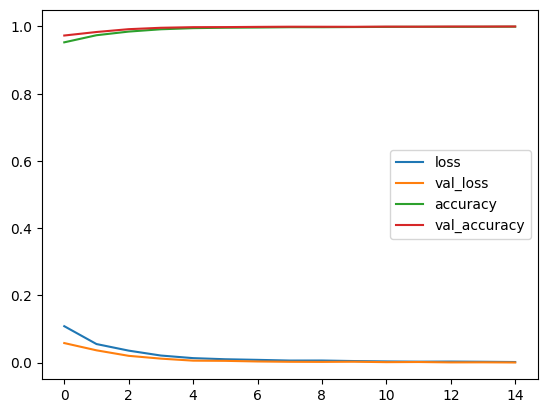

In [13]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
lstm_train_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']
plt.plot(lstm_train_loss)
plt.plot(lstm_val_loss)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

9988/9988 [==============================] - 58s 6ms/step
[[1. 1.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]
[[159520    284]
 [   792 159012]]
0.9966333758854596
(array([0.99505963, 0.99821716]), array([0.99822282, 0.99504393]), array([0.99663872, 0.99662802]), array([159804, 159804]))
(0.9966383945991937, 0.9966333758854597, 0.9966333673801943, None)


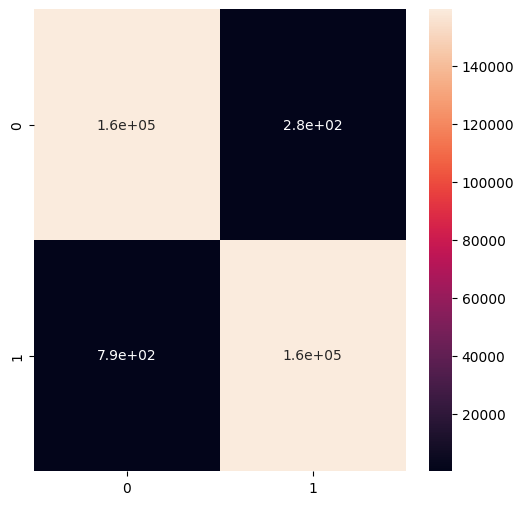

In [14]:
# Perfrom fault diagnosis and evaluate results
y_pred_vld0 = regressor.predict(X_vld)
y_pred0 = (y_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred_vld0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm0_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm0_vld)
print(accuracy_score(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm0_vld, annot=True)

In [15]:
import pickle
# save the model to disk
filename = 'Model/LSTM_model_HM2class.sav'
pickle.dump(regressor, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

24988/24988 [==============================] - 147s 6ms/step
[[1. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[379355  20449]
 [  2911 396893]]
0.970785684985643
(array([0.99238488, 0.95100182]), array([0.94885244, 0.99271893]), array([0.97013055, 0.9714127 ]), array([399804, 399804]))
(0.9716933500402822, 0.9707856849856429, 0.9707716241687248, None)


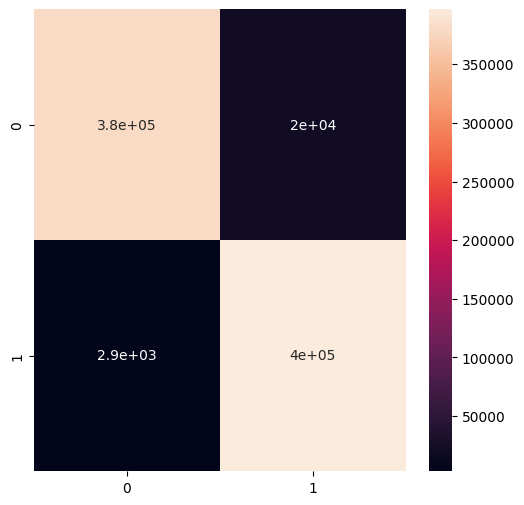

In [16]:
# Test diagnosis performance and evaluate results
y_pred_test0 = regressor.predict(X_test)
y_pred0 = (y_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred_test0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm0_test = confusion_matrix(y_test, y_pred_test01)
print(cm0_test)
print(accuracy_score(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm0_test, annot=True)

### GRU

In [17]:
## Build and train the GRU model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Adding GRU layers and some Dropout regularisation
regressor1 = Sequential()
regressor1.add(GRU(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor1.add(Dropout(0.2))
regressor1.add(GRU(units = 128, return_sequences = True))
regressor1.add(Dropout(0.2))
regressor1.add(GRU(units = 64, return_sequences = True))
regressor1.add(Dropout(0.2))
regressor1.add(GRU(units = 32))
regressor1.add(Dropout(0.2))
regressor1.add(Dense(units = y_train.shape[1], activation='softmax')) # Output layer

# Defining learning rate
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.CosineDecay(
                initial_learning_rate,
                decay_steps=10000,
                alpha=0.2)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
# Compiling the GRU
regressor1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the GRU to the Training set
time_callback1=TimeHistory()
gru_history=regressor1.fit(X_train, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback1])
print(sum(time_callback1.times))

Epoch 1/15
375/375 [==============================] - 10s 20ms/step - loss: 0.1291 - accuracy: 0.9465 - val_loss: 0.0676 - val_accuracy: 0.9711
Epoch 2/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0667 - accuracy: 0.9697 - val_loss: 0.0538 - val_accuracy: 0.9731
Epoch 3/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0570 - accuracy: 0.9739 - val_loss: 0.0427 - val_accuracy: 0.9836
Epoch 4/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0398 - accuracy: 0.9834 - val_loss: 0.0342 - val_accuracy: 0.9866
Epoch 5/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0243 - accuracy: 0.9903 - val_loss: 0.0130 - val_accuracy: 0.9945
Epoch 6/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0176 - accuracy: 0.9931 - val_loss: 0.0112 - val_accuracy: 0.9953
Epoch 7/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0136 - accuracy: 0.9947 - val_loss: 0.0089 - val_accuracy: 0.996

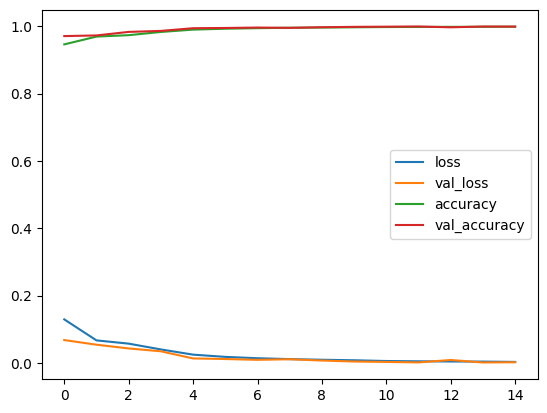

In [18]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
gru_train_loss = gru_history.history['loss']
gru_val_loss = gru_history.history['val_loss']
plt.plot(gru_train_loss)
plt.plot(gru_val_loss)
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

9988/9988 [==============================] - 55s 5ms/step
[[1. 1.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]
[[159525    279]
 [  1540 158264]]
0.9943086531000476
(array([0.99043864, 0.99824023]), array([0.99825411, 0.99036319]), array([0.99433102, 0.99428611]), array([159804, 159804]))
(0.9943394339166625, 0.9943086531000476, 0.9943085645035183, None)


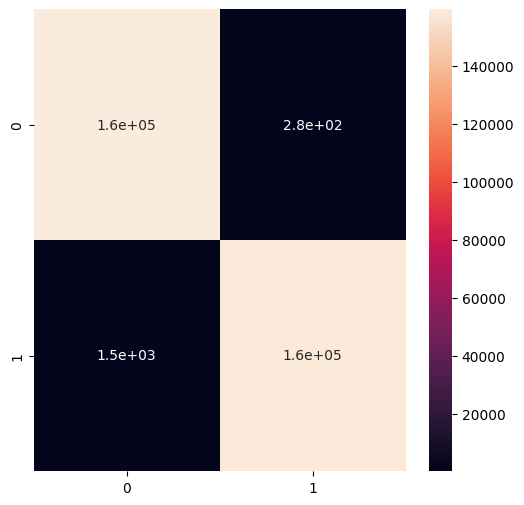

In [19]:
# Perfrom fault diagnosis and evaluate results
y2_pred_vld0 = regressor1.predict(X_vld)
y_pred0 = (y2_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm2_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm2_vld)
print(accuracy_score(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm2_vld, annot=True)

In [20]:
import pickle
# save the model to disk
filename = 'Model/GRU_model_HM2class.sav'
pickle.dump(regressor1, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

24988/24988 [==============================] - 137s 6ms/step
[[1. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[380572  19232]
 [   660 399144]]
0.9751228101769868
(array([0.99826877, 0.95403178]), array([0.95189643, 0.99834919]), array([0.97453126, 0.9756875 ]), array([399804, 399804]))
(0.9761502753739564, 0.9751228101769867, 0.9751093825657537, None)


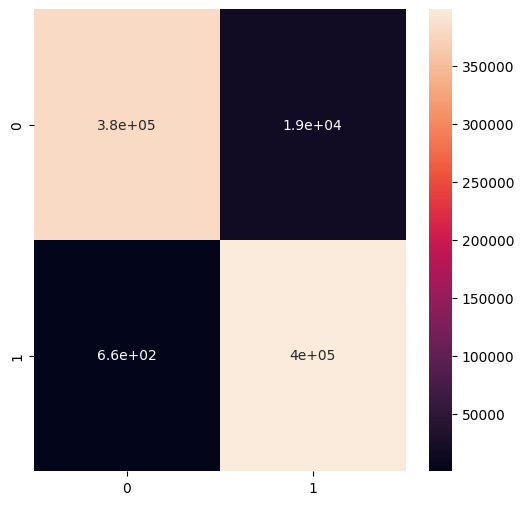

In [21]:
# Perfrom fault diagnosis and evaluate results
y2_pred_test0 = regressor1.predict(X_test)
y_pred0 = (y2_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm2_test = confusion_matrix(y_test, y_pred_test01)
print(cm2_test)
print(accuracy_score(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm2_test, annot=True)

### 2D CNN

In [22]:
# Reconstruct datasets for CNN architecture input
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2], 1))
X_vld1 = np.reshape(X_vld, (X_vld.shape[0], X_vld.shape[1],X_vld.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],X_test.shape[2], 1))
print(X_train1.shape)
print(X_vld1.shape)
print(X_test1.shape)

(479608, 50, 7, 1)
(319608, 50, 7, 1)
(799608, 50, 7, 1)


In [23]:
# Build and train the CNN model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Adding onvolutional layers and some Dropout regularisation
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),activation='relu', input_shape=(X_train1.shape[1],X_train1.shape[2],X_train1.shape[3])))
cnn.add(tf.keras.layers.Dropout(0.2)) 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2)) 

cnn.add(tf.keras.layers.Flatten()) # Flattening

cnn.add(tf.keras.layers.Dense(units=64, activation='relu')) # Full connection
cnn.add(tf.keras.layers.Dropout(0.2)) 
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2)) 

cnn.add(tf.keras.layers.Dense(units=y_train.shape[1],activation='softmax')) # Output layer

# Defining learning rate
initial_learning_rate = 0.005
lr_schedule = keras.optimizers.schedules.CosineDecay(
                initial_learning_rate,
                decay_steps=10000,
                alpha=0.01)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
# Compiling the CNN
cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the CNN to the Training set
time_callback2=TimeHistory()
cnn_history=cnn.fit(X_train1, y_train, epochs = 15, batch_size = 1024, validation_split=0.2, shuffle=True, callbacks=[time_callback2])
print(sum(time_callback2.times))

Epoch 1/15


2025-10-10 13:31:48.396861: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 11ms/step - loss: 0.1844 - accuracy: 0.9360 - val_loss: 0.0902 - val_accuracy: 0.9647
Epoch 2/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0858 - accuracy: 0.9645 - val_loss: 0.0669 - val_accuracy: 0.9742
Epoch 3/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0716 - accuracy: 0.9713 - val_loss: 0.0482 - val_accuracy: 0.9813
Epoch 4/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0636 - accuracy: 0.9747 - val_loss: 0.0357 - val_accuracy: 0.9863
Epoch 5/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0523 - accuracy: 0.9796 - val_loss: 0.0300 - val_accuracy: 0.9882
Epoch 6/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0417 - accuracy: 0.9839 - val_loss: 0.0339 - val_accuracy: 0.9867
Epoch 7/15
375/375 [==============================] - 4s 9ms/step - loss: 0.0491 - accuracy: 0.9815 - val_loss: 0.0160 - val_accuracy: 0.9940
Epoch 8/15


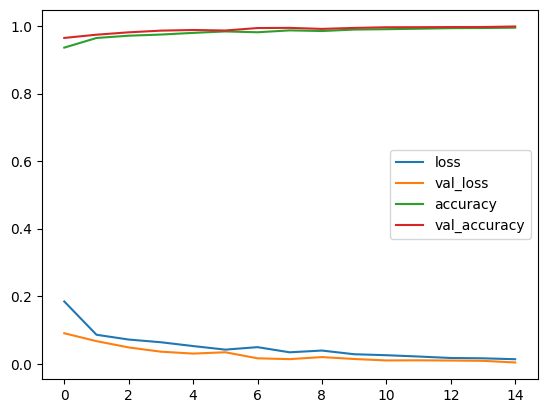

In [24]:
# Visualize training and validation loss
import matplotlib.pyplot as plt
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']
plt.plot(cnn_train_loss)
plt.plot(cnn_val_loss)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

9988/9988 [==============================] - 9s 847us/step
[[1. 1.]
 [1. 1.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]
[[159511    293]
 [  1174 158630]]
0.9954100022527597
(array([0.99269378, 0.99815634]), array([0.9981665, 0.9926535]), array([0.99542262, 0.99539731]), array([159804, 159804]))
(0.9954250598090615, 0.9954100022527597, 0.9954099673763068, None)


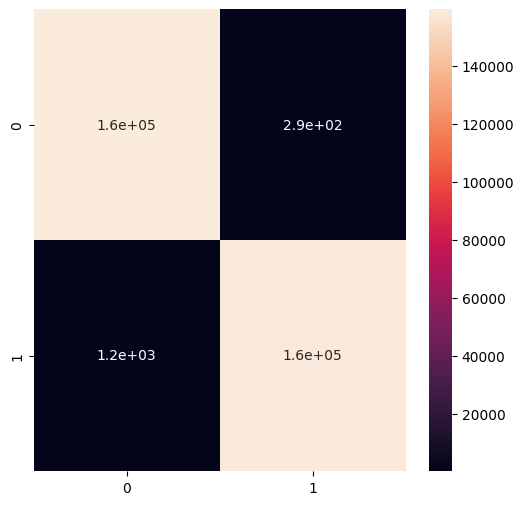

In [25]:
# Perfrom fault diagnosis and evaluate results
y3_pred_vld0 = cnn.predict(X_vld1)
y_pred0 = (y3_pred_vld0 > 0.5)
y_pred_vld01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_vld01.reshape(len(y_pred_vld01),1), y_vld.reshape(len(y_vld),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm3_vld = confusion_matrix(y_vld, y_pred_vld01)
print(cm3_vld)
print(accuracy_score(y_vld, y_pred_vld01)) 
print(precision_recall_fscore_support(y_vld, y_pred_vld01))
print(precision_recall_fscore_support(y_vld, y_pred_vld01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm3_vld, annot=True)

In [26]:
import pickle
# save the model to disk
filename = 'Model/CNN_model_HM2class.sav'
pickle.dump(cnn, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

24988/24988 [==============================] - 21s 858us/step
[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[356596  43208]
 [   242 399562]]
0.9456608738281758
(array([0.99932182, 0.90241435]), array([0.89192704, 0.9993947 ]), array([0.94257522, 0.94843183]), array([399804, 399804]))
(0.9508680835776175, 0.9456608738281758, 0.9455035248234527, None)


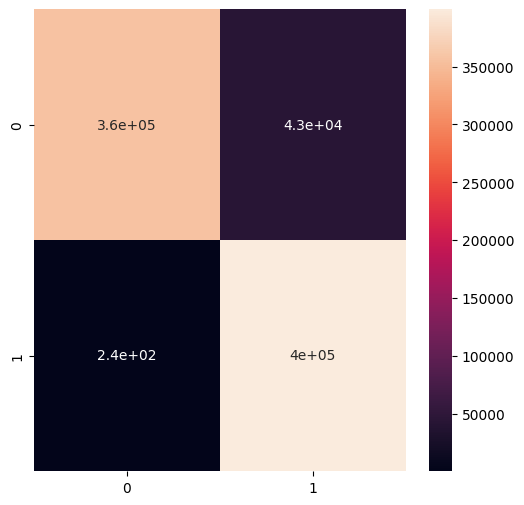

In [27]:
# Test diagnosis performance and evaluate results
y3_pred_test0 = cnn.predict(X_test1)
y_pred0 = (y3_pred_test0 > 0.5)
y_pred_test01=np.argmax(y_pred0, axis = 1)
print(np.concatenate((y_pred_test01.reshape(len(y_pred_test01),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm3_test = confusion_matrix(y_test, y_pred_test01)
print(cm3_test)
print(accuracy_score(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01))
print(precision_recall_fscore_support(y_test, y_pred_test01, average='macro'))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
f = sns.heatmap(cm3_test, annot=True)

In [28]:
## Save training and validation history
import pandas as pd
history = pd.DataFrame({'LSTM Training Loss':lstm_history.history['loss'], 'LSTM Validation Loss':lstm_history.history['val_loss'],
                        'LSTM Training Accuracy':lstm_history.history['accuracy'], 'LSTM Validation Accuracy':lstm_history.history['val_accuracy'],
                        'GRU Training Loss':gru_history.history['loss'], 'GRU Validation Loss':gru_history.history['val_loss'],
                        'GRU Training Accuracy':gru_history.history['accuracy'], 'GRU Validation Accuracy':gru_history.history['val_accuracy'],
                        'CNN Training Loss':cnn_history.history['loss'], 'CNN Validation Loss':cnn_history.history['val_loss'],
                        'CNN Training Accuracy':cnn_history.history['accuracy'], 'CNN Validation Accuracy':cnn_history.history['val_accuracy'],
                       })
history.to_csv('History/HistoryAll_HM2class.csv')
history

,LSTM Training Loss,LSTM Validation Loss,LSTM Training Accuracy,LSTM Validation Accuracy,GRU Training Loss,GRU Validation Loss,GRU Training Accuracy,GRU Validation Accuracy,CNN Training Loss,CNN Validation Loss,CNN Training Accuracy,CNN Validation Accuracy
0,0.108308,0.058114,0.952766,0.973041,0.129057,0.067586,0.946482,0.971122,0.184388,0.090199,0.935968,0.964680
1,0.055212,0.036541,0.973898,0.983497,0.066653,0.053836,0.969668,0.973061,0.085777,0.066850,0.964539,0.974250
2,0.035608,0.020143,0.984748,0.991910,0.056983,0.042721,0.973854,0.983601,0.071578,0.048221,0.971297,0.981308
3,0.021013,0.011809,0.991616,0.996049,0.039750,0.034219,0.983419,0.986552,0.063583,0.035659,0.974680,0.986291
4,0.013290,0.005797,0.994967,0.997873,0.024278,0.013001,0.990344,0.994548,0.052307,0.029989,0.979634,0.988188
5,0.009982,0.005228,0.996268,0.998082,0.017627,0.011239,0.993057,0.995267,0.041718,0.033945,0.983906,0.986698
6,0.008161,0.003365,0.996885,0.998749,0.013614,0.008869,0.994678,0.996497,0.049063,0.015979,0.981487,0.993964
7,0.006091,0.002422,0.997764,0.999249,0.010978,0.010574,0.995929,0.995611,0.033785,0.013579,0.987055,0.994496
8,0.006196,0.002128,0.997753,0.999124,0.009101,0.006767,0.996630,0.997394,0.039005,0.019675,0.985142,0.991451
9,0.004601,0.002639,0.998230,0.999010,0.007545,0.003800,0.997266,0.998582,0.028086,0.014002,0.989426,0.994329
